# &#x1F4D1; &nbsp; $ \mathfrak {\color{#348ABD} {P0: \ Titanic \ Survival \ Exploration}}$

## $\mathfrak {\color{#348ABD} {1. \ References}}$
#### Dataset:
In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. 

The data contains demographics and voyage information from 891 of the 2224 passengers and crew on board the ship.

This link allows reading the description of this dataset on the Kaggle website, where the data was obtained. https://www.kaggle.com/c/titanic/data

#### Resources :
Intro to Data Science. Udacity: https://www.udacity.com/course/intro-to-data-science--ud359

Statistics in Python. Scipy Lecture Notes: http://www.scipy-lectures.org/packages/statistics/index.html

A Visual Introduction to Machine Learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

The scikit-learn metrics: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## $\mathfrak {\color{#348ABD} {2. \ Code \ Tools}}$ 

In [1]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input style="color: #338DD4; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [2]:
hide_code
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

## $\mathfrak {\color{#348ABD} { 3. \ Statistical\ Analysis \ and \ Data \ Exploration}}$
#### 3.1 Dataset
Let's extract the data from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
hide_code
# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
hide_code
# Display the data info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 3.2 Survived
The next step is removing the ***Survived*** feature from the data and storing it separately as our prediction targets.

In [5]:
hide_code
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head(3))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The very same sample of the RMS Titanic data now shows the Survived feature removed from the DataFrame. 

Note that the passenger data and the outcomes of survival are now paired. That means for any passenger ***data.loc[i]***, they have the survival ***outcomes[i]***.

#### 3.3 Accuracy score
To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival - the function ***accuracy_score()***. Since we are interested in how accurate our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct.

In [6]:
hide_code
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return ("Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100))
    
    else:
        return ("Number of predictions does not match number of outcomes!")

## $\mathfrak {\color{#348ABD} { 4. \ Making \ Predictions}}$
Let's test a prediction on the first five passengers that they survived.

In [7]:
hide_code
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print (accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  
The ***predictions_0()*** function below will always predict that a passenger did not survive.

In [8]:
hide_code
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*
### Answer 1

In [9]:
hide_code
# Make the predictions that a passenger did not survive
predictions = predictions_0(data) 
# Check accuracy
accuracy_score(outcomes, predictions)

'Predictions have an accuracy of 61.62%.'

Let's take a look at whether the feature ***Sex*** has any indication of survival rates among passengers using the ***survival_stats()*** function. This function is defined in the ***visualizations.py*** Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.

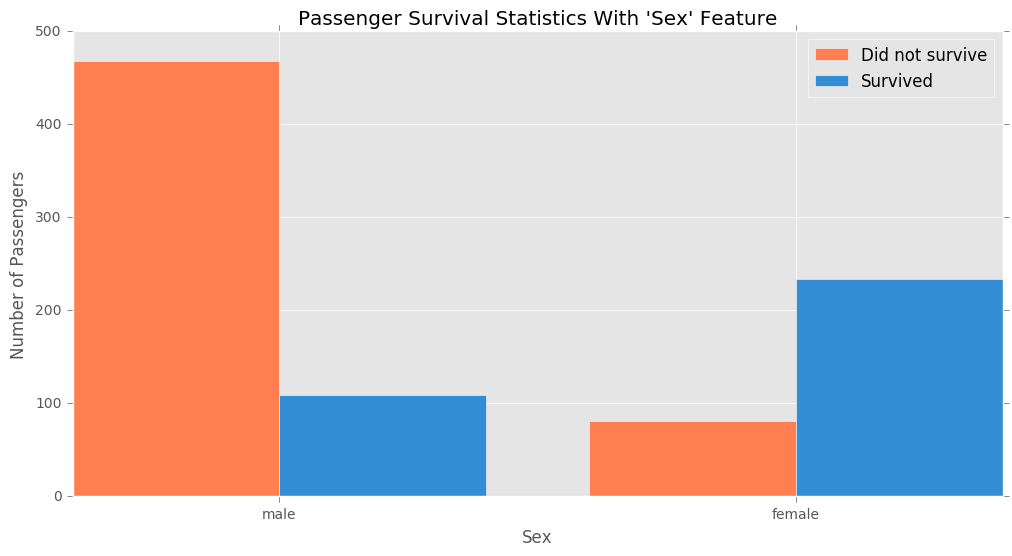

In [10]:
hide_code
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females did survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.

In [11]:
hide_code
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive (**prediction_1()***)?
### Answer 2

In [12]:
hide_code
# Make the predictions 
predictions1 = predictions_1(data) 
# Check accuracy
accuracy_score(outcomes, predictions1)

'Predictions have an accuracy of 78.68%.'

Using just the Sex feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. 

Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? 

Let's start by looking at the Age of each male, by again using the ***survival_stats()*** function. This time, we'll use the fourth parameter to filter out the data so that only passengers with the Sex 'male' will be included.

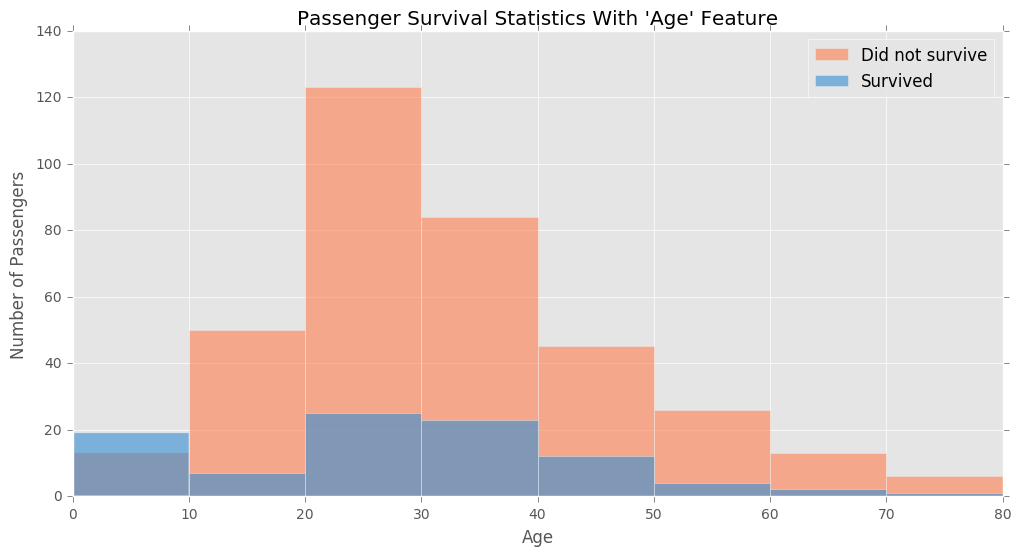

In [14]:
hide_code
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older did not survive the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.

In [15]:
hide_code
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        elif passenger['Sex'] == 'male' and passenger['Age'] < 10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived (**prediction_2()***)?
### Answer 3

In [16]:
hide_code
# Make the predictions 
predictions2 = predictions_2(data) 
# Check accuracy
accuracy_score(outcomes, predictions2)

'Predictions have an accuracy of 79.35%.'

Adding the feature Age as a condition in conjunction with Sex improves the accuracy by a small margin more than with simply using the feature Sex alone. Now we can try to find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. We can use the same feature multiple times with different conditions.

There are some experiments and th function ***prediction_final()*** as a result:

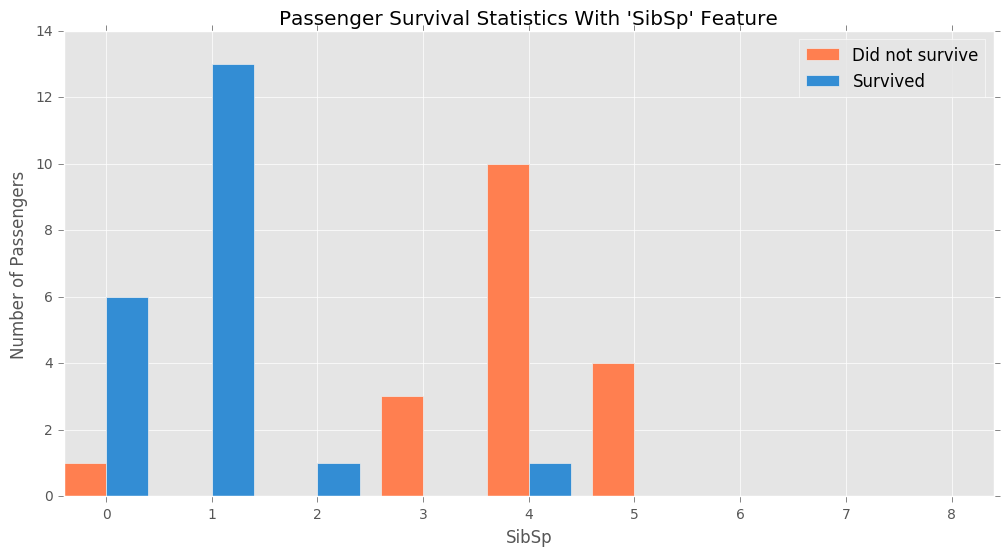

In [18]:
hide_code
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'male'", "Age < 15"])

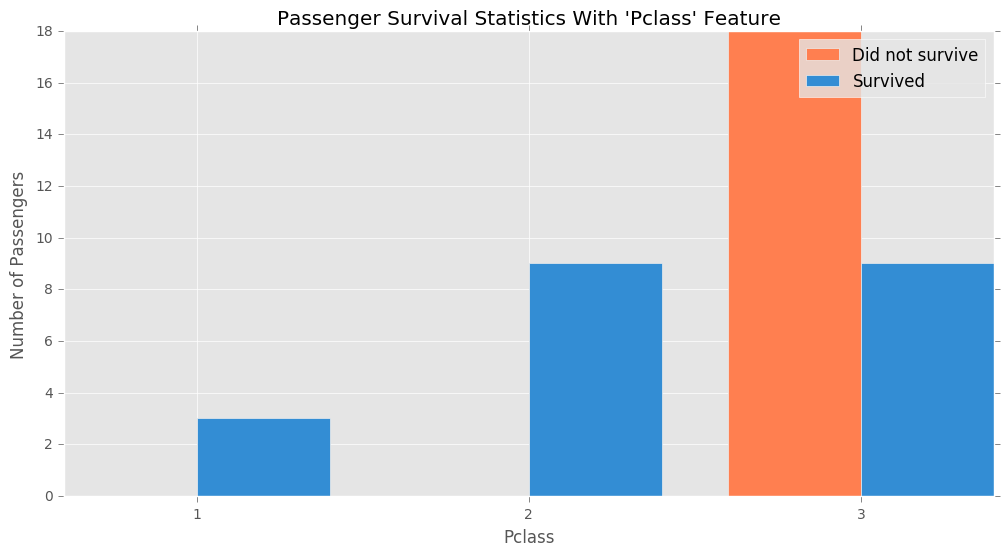

In [19]:
hide_code
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'male'", "Age < 15"])

In [21]:
hide_code
def predictions_final(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if (passenger['Sex'] == 'female'):
            predictions.append(1)
                
        elif passenger['Pclass'] in [1,2] and (passenger['Age'] < 16 or passenger['Age'] > 75):
            predictions.append(1)
            
        elif passenger['Age'] < 15 and passenger['SibSp'] < 3:
            predictions.append(1)
            
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

### Question 4
*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes into the data? How accurate are your predictions?*
### Answer 4
The final set of features ***Sex, Age, SibSp*** and ***Pclass*** are the most informative on my opinion.

As we noted the percentage of survivors of passengers is much higher among women than among men, and it was used in our predictions.

Next, I proceed from the assumption that because of humanitarian reasons people rescue children and elders at first. Unfortunately, this was only valid for the passengers of the first and second classes in this dataset.

And the latest clarification, which overcomes the border of 80% in prediction accuracy: if a family has more than three children, absolutely all the family may not be survived in catastrophic situations and in an atmosphere of panic.

In [22]:
hide_code
# Make the predictions 
predictions_final = predictions_final(data) 
# Check accuracy
accuracy_score(outcomes, predictions_final)

'Predictions have an accuracy of 80.92%.'

### Scikit-learn Metrics
There is a set of metrics in the ***scikit-learn*** package for evaluation the quality of the prediction.

In [24]:
hide_code
from sklearn.metrics import recall_score, accuracy_score, precision_score
print ("Predictions have an accuracy of {:.2f}%.".format(accuracy_score(outcomes, predictions_final)*100))
print ("Predictions have an recall score equal to {:.2f}%.".format(recall_score(outcomes, predictions_final)*100))
print ("Predictions have an precision score equal to {:.2f}%.".format(precision_score(outcomes,predictions_final)*100))

Predictions have an accuracy of 80.92%.
Predictions have an recall score equal to 74.27%.
Predictions have an precision score equal to 75.60%.


The evaluation terminology:
#### $accuracy = \dfrac{ number \ of \ people \ that \ are \ correctly\ predicted \ as \ survived \ or \ non-survived }{ number \ of \ all \ people \ in \ the \ dataset }$
#### $recall = \dfrac{ number \ of \ people \ that \ are \ predicted \ as \ survived \ and \ they \ are \ actually \ survived } { number \ of \ people \ are \ actually \ survived }$
#### $precision =  \dfrac{ number \ of \ people \ that \ are \ predicted \ as \ survived \ and \ they \ are \ actually \ survived } { number \ of \ people \ that \ are \ predicted \ as \ survived }$

It's easy to see that we could be enough confident in this prediction. I think this model can be improved and it's possible to find a way for that.

#### Question 5
*Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.*

#### Answer 5
There are several natural ideas for applying the supervised learning.

I. For every catastrophic situation, find out the exact sequence of steps and technical facilities which maximally decrease the damage. On the basis of the identified trends, it is possible to develop and check in practice clear guidelines to save lives and restore economic activities (for example, during and after the floods). Applying the scientific methods, in this case, means thousands of lives and quick recovering the economics. The useful features can evaluate disasters (areas, time period), damage (human lives, economic indicators) and recovery process (speed, effectiveness).

II. The same techniques could be useful in the process of creating self-learning facilities of virtual reality in order to bring the process of their development to the real counterparts, predict it and make corrections in time. Here the set of concrete features is very individual and depends on the object. For example, it can be growth, flowering, etc. for the plant and its imitation.

### 5. Сonclusion

In this project, we use a manual implementation of a simple machine learning model, the ***decision tree*** which splits a set of data into smaller and smaller groups (called nodes), by one feature at a time. Our predictions become more accurate if each of the resulting subsets is more homogeneous (contain similar labels) than before.

A decision tree is just one of many models that come from ***supervised learning***, i.e. learning a model from labeled training data to make predictions about unseen or future data in a set of samples the desired outputs are already known.

Overvaluation of meaning and application of machine learning is unlikely to succeed. And the particular supervised method has a special importance because of the possibility of a permanent correlation of the predictions with the result of real actions.